In [1]:
pip install --upgrade diffusers transformers -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
import torch
import numpy as np
from PIL import Image
# from transformers import StableDiffusionPipeline

In [24]:
class CFG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (340, 600)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12
    black_region_height = 200

In [25]:
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", use_auth_token='your_hugging_face_auth_token', guidance_scale=9
)
image_gen_model = image_gen_model.to(CFG.device)

text_encoder/model.safetensors not found
Keyword arguments {'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [26]:
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]

    # Convert PIL Image to NumPy array
    image_array = np.array(image)

    # Check and resize the black region array if needed
    black_region = np.zeros((CFG.black_region_height, CFG.image_gen_size[0], 3), dtype=np.uint8)
    if black_region.shape[1] != image_array.shape[1]:
        black_region = np.zeros((CFG.black_region_height, image_array.shape[1], 3), dtype=np.uint8)

    # Add black region at the bottom
    image_array[-CFG.black_region_height:] = black_region

    # Convert NumPy array back to PIL Image
    image = Image.fromarray(image_array)

    # Resize the image
    image = image.resize(CFG.image_gen_size)
    return image

In [27]:
company_name = 'NIKE'
product_name = 'Sneakers/Shoes'
product_details = "A permium shoe making company which has it's brand involved in all sports and fitness."
theme_name = 'Black'

In [28]:
prompts = ["Generate a text-free ad template for '{product_name}' by '{company_name}' with a '{theme_name}' theme. Showcase the product prominently and ensure a visually appealing design. Include '{product_details}'",
          "Create a clean, text-free ad template for '{product_name}' by '{company_name}' with a '{theme_name}' theme. Emphasize the product and its details in a visually striking design."]

In [29]:
# prompt = "Generate a text-free ad template for '{product_name}' by '{company_name}' with a '{theme_name}' theme. Showcase the product prominently and ensure a visually appealing design. Include '{product_details}'"
prompt = "generate a poster template which has multiple images for an advertisement premium sports shoe production company 'Nike' which has a curved tickmark as it's logo without any text in the whole generated image. The template should be versatile for customization, focusing solely on visual elements without any text"

  0%|          | 0/35 [00:00<?, ?it/s]

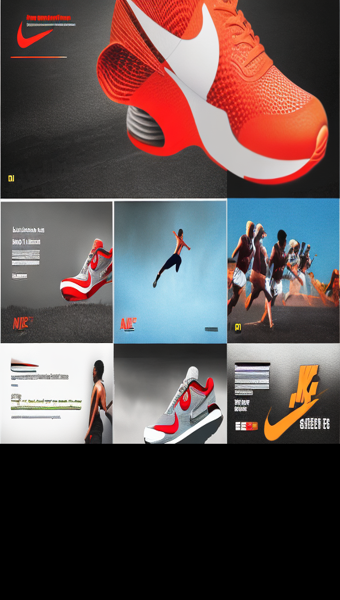

In [30]:
x = generate_image(prompt, image_gen_model)
x

In [31]:
x.save("/kaggle/working/generated_image.png")

In [32]:
company_name = 'APPLE'
product_name = 'IPhone'
product_details = "A very permium mobile phone."
theme_name = 'Black'

In [34]:
prompt1 = f"Create a high-quality image for an advertisement showcasing {company_name}'s {product_name}. The product details include that it is {product_details}. The theme of the ad should be {theme_name}."

  0%|          | 0/35 [00:00<?, ?it/s]

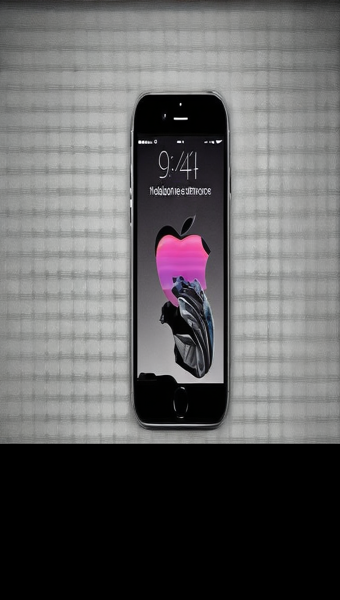

In [35]:
y = generate_image(prompt1, image_gen_model)
y

In [ ]:
y.save(/kag)

In [38]:
company_name = 'AXE'
product_name = 'AXE 360'
product_details = "A very permium perfume."
theme_name = 'Black'

In [39]:
prompt2 = f"Create a high-quality image for an advertisement showcasing {company_name}'s {product_name}. The product details include that it is {product_details}. The theme of the ad should be {theme_name}."

  0%|          | 0/35 [00:00<?, ?it/s]

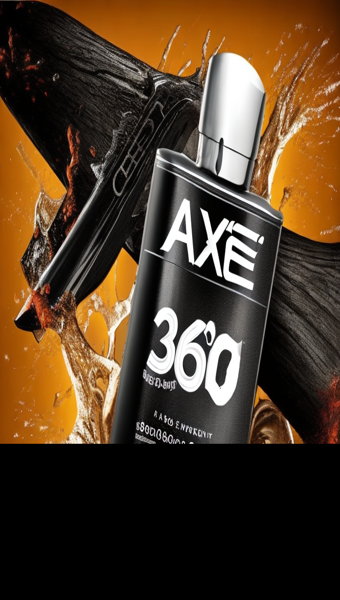

In [40]:
z = generate_image(prompt2, image_gen_model)
z

In [41]:
prompt3 = "Create a visually stunning and captivating advertisement for Axe's premium perfume. The perfume is exceptionally luxurious, and the theme should be centered around the color black. Design it as a sophisticated piece that conveys the elegance and allure of the product."

  0%|          | 0/35 [00:00<?, ?it/s]

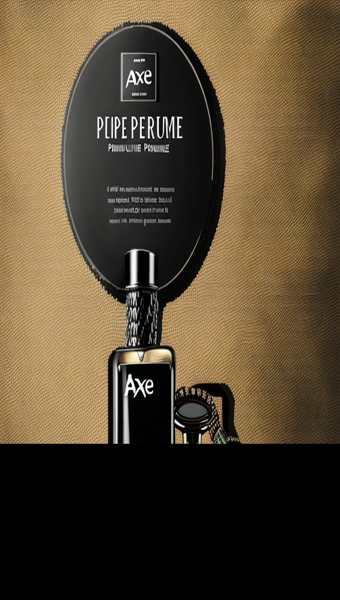

In [42]:
z1 = generate_image(prompt3, image_gen_model)
z1

In [43]:
company_name = 'AXE'
product_name = 'AXE 360'
product_details = "A very permium perfume."
theme_name = 'Black'

In [48]:
promptaxe = "Create a visually stunning and elegant advertisement for Axe's premium perfume. The product details include it being a very premium perfume. which is white in colour. Set the background to black and mix (blend) the backgrond of the theme accodingly which is completely in dark black colour"

  0%|          | 0/35 [00:00<?, ?it/s]

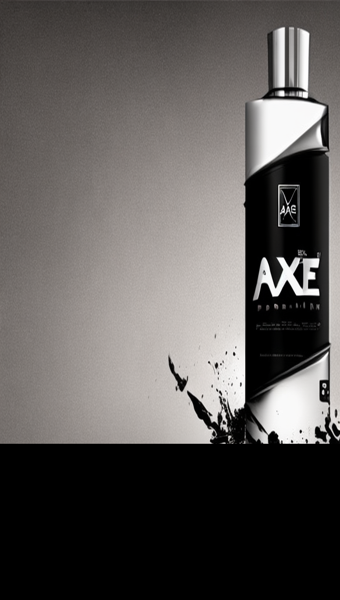

In [49]:
z12 = generate_image(promptaxe, image_gen_model)
z12

In [55]:
promptx = ad_prompt

In [54]:
ad_prompt = "Create an advertisement for Nike's Sneakers. It is a very premium fitness sneakers. The theme should be Black. Design it as an Instagram Post."

  0%|          | 0/35 [00:00<?, ?it/s]

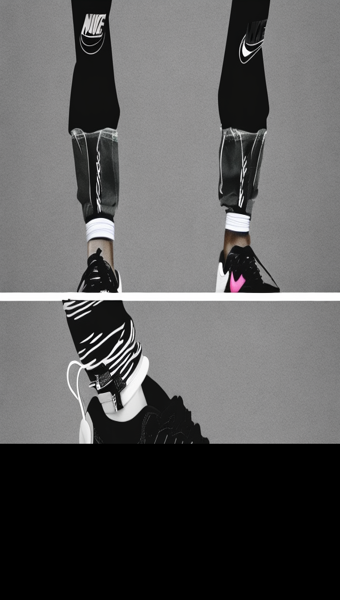

In [56]:
z122 = generate_image(promptx, image_gen_model)
z122

In [57]:
ad_x = "Create a high-quality image for an advertisement showcasing Nike's Sneakers. The product details include that it is a premium fitness Sneaker. The theme of the ad should be Black."

  0%|          | 0/35 [00:00<?, ?it/s]

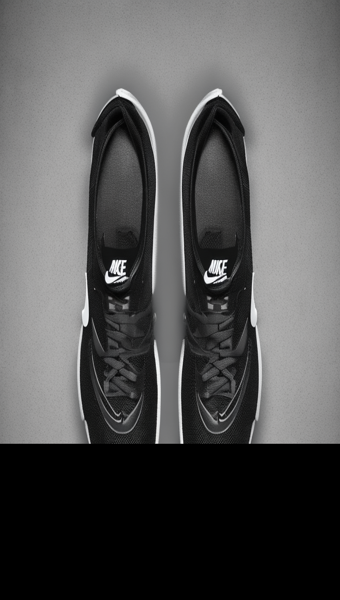

In [58]:
promptx = ad_x
z122 = generate_image(promptx, image_gen_model)
z122